In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PCA import PCA_Component

data_1 = pd.read_csv("data/BATADAL_dataset03.csv")
data_2 = pd.read_csv("data/BATADAL_dataset04.csv", delimiter=r",\s{0,1}")
test_data = pd.read_csv("data/BATADAL_test_dataset.csv")

data_1["DATETIME"] = pd.to_datetime(data_1.DATETIME)
data_2["DATETIME"] = pd.to_datetime(data_2.DATETIME)
test_data["DATETIME"] = pd.to_datetime(test_data.DATETIME)
data_2['ATT_FLAG'] = data_2["ATT_FLAG"].replace(-999, 0)    # replace -999 with 0 for convenience

signals = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

### Make test data `ATT_FLAG` column as described in `Attacks_TestDataset.png`

*NOTE:* We will make the state of no-arrack as 0 instead of -999

In [16]:
import datetime
test_data['ATT_FLAG'] = pd.Series(np.zeros(test_data.shape[0])) # default 0 (no-attack)

# start setting values
attack_times = [
    [pd.Timestamp("2017-01-16T09"), pd.Timestamp("2017-01-19T06")],
    [pd.Timestamp("2017-01-30T08"), pd.Timestamp("2017-02-02T00")],
    [pd.Timestamp("2017-02-09T03"), pd.Timestamp("2017-02-10T09")],
    [pd.Timestamp("2017-02-12T01"), pd.Timestamp("2017-02-13T07")],
    [pd.Timestamp("2017-02-24T05"), pd.Timestamp("2017-02-28T08")],
    [pd.Timestamp("2017-03-10T14"), pd.Timestamp("2017-03-13T21")],
    [pd.Timestamp("2017-03-25T20"), pd.Timestamp("2017-03-27T01")]
]

# showing how distribution of 0s and 1s changes
# print(test_data['ATT_FLAG'].value_counts(normalize=True))
for times in attack_times:
    indexes = np.where(test_data['DATETIME'].between(times[0], times[1], inclusive=True))[0]
    test_data['ATT_FLAG'][indexes] = 1 # set 1 (attack)
    # print(test_data['ATT_FLAG'].value_counts(normalize=True))

# make train X and test X Y
X_train = data_1[signals].to_numpy()
X_test = test_data[signals].to_numpy()
Y_test = test_data['ATT_FLAG'].to_numpy()

results = {}

### The 4 Methods
We will train and test the 4 methods one by one, save the results in `results{}` and show all the results together.
#### LOF

#### PCA

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PCA import PCA_Component

data_1["DATETIME"] = pd.to_datetime(data_1.DATETIME)
data_2["DATETIME"] = pd.to_datetime(data_2.DATETIME)
test_data["DATETIME"] = pd.to_datetime(test_data.DATETIME)
signals = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']
# import datetime
# test_data['ATT_FLAG'] = pd.Series(np.zeros(test_data.shape[0])) # default 0 (no-attack)

# # start setting values
# attack_times = [
#     [pd.Timestamp("2017-01-16T09"), pd.Timestamp("2017-01-19T06")],
#     [pd.Timestamp("2017-01-30T08"), pd.Timestamp("2017-02-02T00")],
#     [pd.Timestamp("2017-02-09T03"), pd.Timestamp("2017-02-10T09")],
#     [pd.Timestamp("2017-02-12T01"), pd.Timestamp("2017-02-13T07")],
#     [pd.Timestamp("2017-02-24T05"), pd.Timestamp("2017-02-28T08")],
#     [pd.Timestamp("2017-03-10T14"), pd.Timestamp("2017-03-13T21")],
#     [pd.Timestamp("2017-03-25T20"), pd.Timestamp("2017-03-27T01")]
# ]

# for times in attack_times:
#     indexes = np.where(test_data['DATETIME'].between(times[0], times[1], inclusive=True))[0]
#     test_data['ATT_FLAG'][indexes] = 1 # set 1 (attack)

X = data_1[signals].to_numpy()
test_X = test_data[signals].to_numpy()
test_Y = test_data['ATT_FLAG'].to_numpy()

In [18]:
from PCA import PCA_Component
from metrics import run_metrics

pca = PCA_Component()
pca.set_X(X)
n_components = 10
pca.PCA_fit_transform(n_components)
y_pred = pca.classify(test_X)
result = run_metrics(test_Y, y_pred)
results['PCA'] = result

#### ARMA

#### N-gram

In [19]:
from N_gram import N_gram_Component
from metrics import run_metrics
# Make train and test data
# Z is dataset_2
signals = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'F_PU2', 'S_PU2', 'F_PU4', 'S_PU4',
       'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']
Z = data_2[signals].to_numpy()
Z_labels = data_2['ATT_FLAG'].to_numpy()
Z_outlier_indexes = list(np.where(Z_labels == 1))[0]
Z_inlier_indexes = list(np.where(Z_labels == 0))[0]

Z_outliers = Z[Z_outlier_indexes, :]
Z_inliers = Z[Z_inlier_indexes, :]
Z_outlier_labels = Z_labels[Z_outlier_indexes]
Z_inlier_labels = Z_labels[Z_inlier_indexes]

L = 20
N = 1
N_gram = N_gram_Component(N, len(signals))

# discretization is done only once 
params = (10, 10, 5)
Z_inlier_windowed = N_gram.discretise(Z_inliers, window_size=params[0], levels=params[1],  overlap=params[2])
Z_outlier_windowed = N_gram.discretise(Z_outliers, window_size=params[0], levels=params[1],  overlap=params[2])

Z_inlier_labels = N_gram.discretise_labels(Z_inlier_labels, window_size=params[0], overlap=params[2])
Z_outlier_labels = N_gram.discretise_labels(Z_outlier_labels, window_size=params[0], overlap=params[2])

test_X = test_data[signals].to_numpy()
test_X_windowed = N_gram.discretise(test_X, window_size=params[0], levels=params[1],  overlap=params[2])
test_Y = test_data['ATT_FLAG'].to_numpy()
test_Y_windowed = N_gram.discretise_labels(test_Y, window_size=params[0], overlap=params[2])

In [20]:
Z_in_profiles = N_gram.generate_profiles(Z_inlier_windowed, L)
Z_in_profile_labels = N_gram.generate_profile_labels(Z_inlier_labels, L)

Z_out_profiles = N_gram.generate_profiles(Z_outlier_windowed, L)
Z_out_profile_labels = N_gram.generate_profile_labels(Z_outlier_labels, L)

# Stack train data together for training k-NearestNeighbour
train_X = np.vstack((Z_in_profiles, Z_out_profiles))
train_Y = np.vstack((Z_in_profile_labels, Z_out_profile_labels))

test_X_profiles = N_gram.generate_profiles(test_X_windowed, L)
test_X_profile_labels = N_gram.generate_profile_labels(test_Y_windowed, L)

N_gram.fit_kNN(train_X, train_Y)
y_pred = N_gram.classify(test_X_profiles, L)

result = run_metrics(test_X_profile_labels, y_pred)
results["N-gram"] = result

### Results

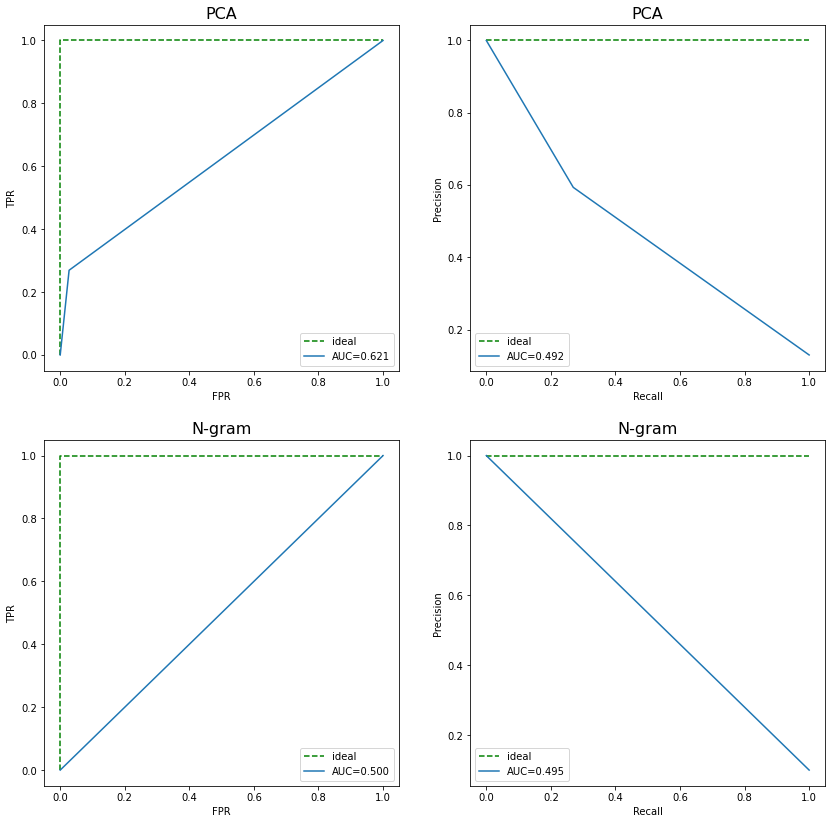

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(14,14)

for i in range(2):
    axs[i,0].set_xlabel("FPR")
    axs[i,0].set_ylabel("TPR")

    axs[i,1].set_xlabel("Recall")
    axs[i,1].set_ylabel("Precision")
i=0
for key in ['PCA', 'N-gram']:
    result = results[key]
    axs[i,0].set_title(key, fontsize=16)
    axs[i,1].set_title(key, fontsize=16)

    axs[i,0].plot([0,0,1], [0,1,1], '--g', label="ideal")
    axs[i,0].plot(result['false_pos_rate'], result['true_pos_rate'], label="AUC=" + str("%.3f" % result["auc"]))
    axs[i,0].legend()

    axs[i,1].plot([0,1], [1,1], '--g', label="ideal")
    axs[i,1].plot(result['recall_curve'], result['precision_curve'], label="AUC=" + str("%.3f" % result["auc_pr"]).format(""))
    axs[i,1].legend()
    i += 1
plt.show()